<a href="https://colab.research.google.com/github/Lokeshgadhi/introonpandas/blob/main/MULTIPLE%20LINEAR%20REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
# prompt: Your task is to perform a multiple linear regression analysis to predict the price of Toyota corolla based on the given attributes

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset (replace 'your_dataset.csv' with the actual file name)
try:
  df = pd.read_csv('your_dataset.csv')
except FileNotFoundError:
  print("Error: 'your_dataset.csv' not found. Please upload your dataset or provide the correct file path.")
  exit()


# Assuming 'Price' is the target variable and other columns are features
# Select features (X) and target (y)
X = df.drop('Price', axis=1)  # Replace 'Price' with the actual target column name
y = df['Price']

# Handle categorical features (if any) using one-hot encoding
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Example prediction (replace with your own data)
# new_data = pd.DataFrame({'feature1': [value1], 'feature2': [value2], ...}) # Prepare new data with the same columns as X
# new_data = pd.get_dummies(new_data) # Apply one-hot encoding if needed
# new_prediction = model.predict(new_data)
# print(f"Predicted price: {new_prediction[0]}")


Mean Squared Error: 2203043.8231437006
R-squared: 0.8348888040611084


   Price  Age_08_04     KM Fuel_Type  HP  Automatic    cc  Doors  Cylinders  \
0  13500         23  46986    Diesel  90          0  2000      3          4   
1  13750         23  72937    Diesel  90          0  2000      3          4   
2  13950         24  41711    Diesel  90          0  2000      3          4   
3  14950         26  48000    Diesel  90          0  2000      3          4   
4  13750         30  38500    Diesel  90          0  2000      3          4   

   Gears  Weight  
0      5    1165  
1      5    1165  
2      5    1165  
3      5    1165  
4      5    1170  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Price      1436 non-null   int64 
 1   Age_08_04  1436 non-null   int64 
 2   KM         1436 non-null   int64 
 3   Fuel_Type  1436 non-null   object
 4   HP         1436 non-null   int64 
 5   Automatic  1436 non-null  

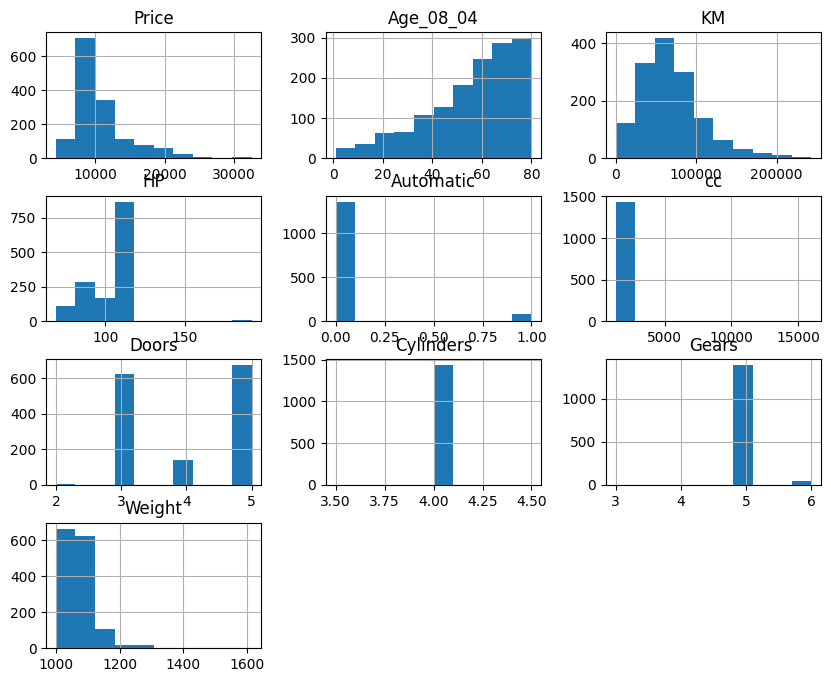

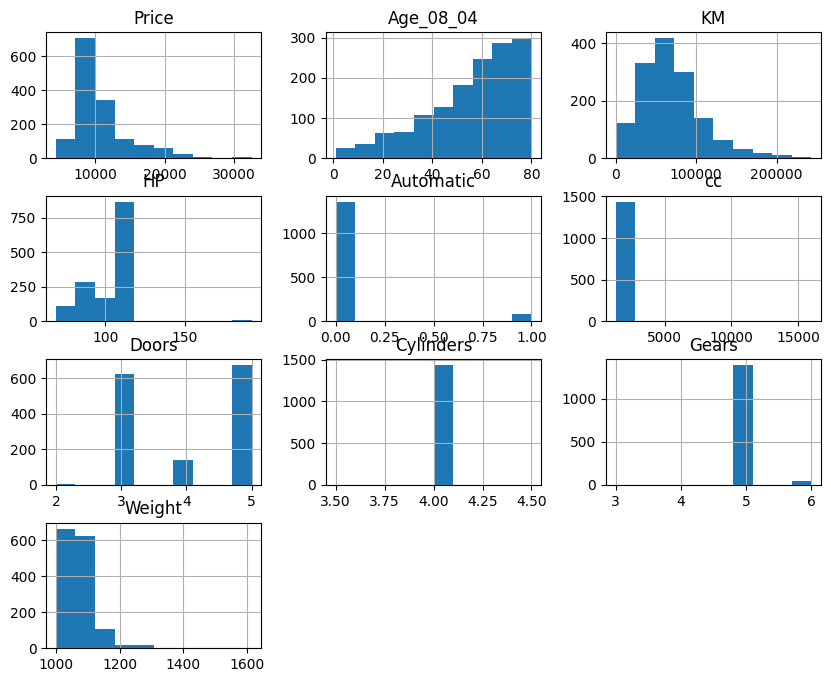

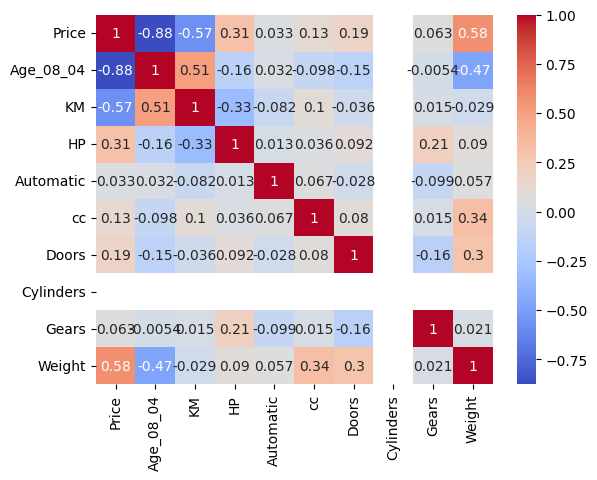

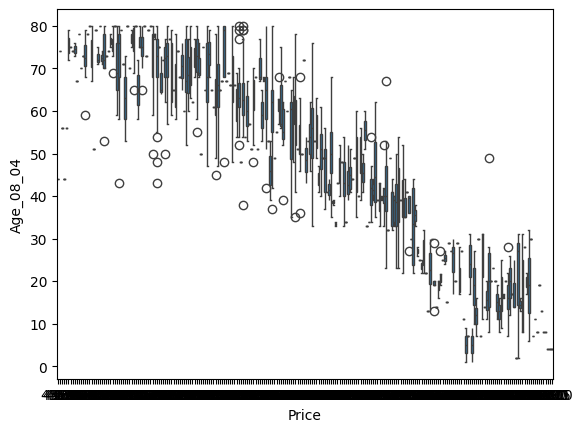

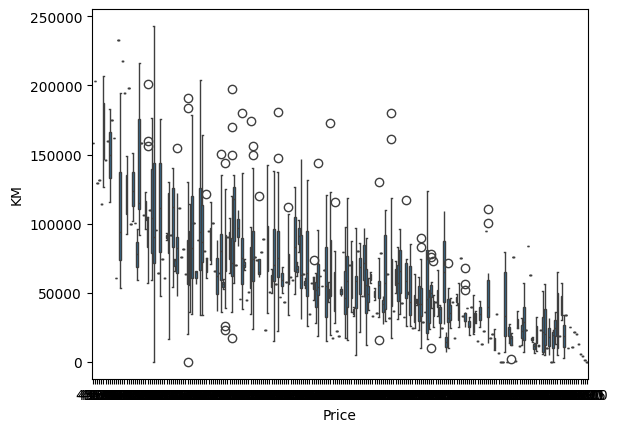

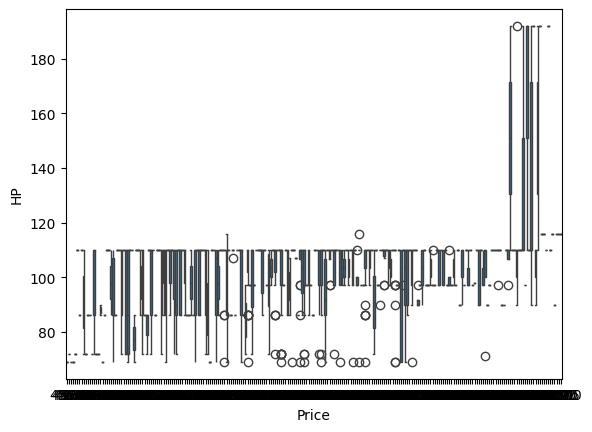

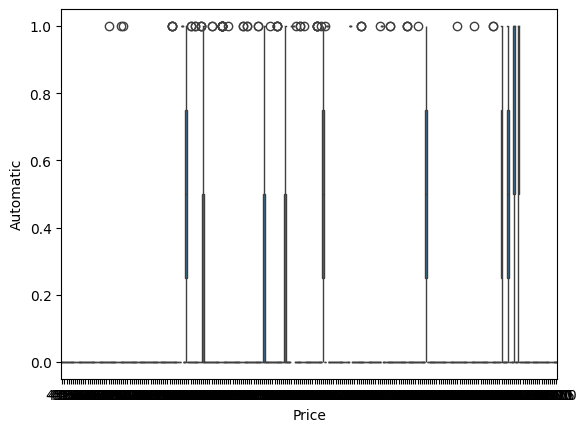

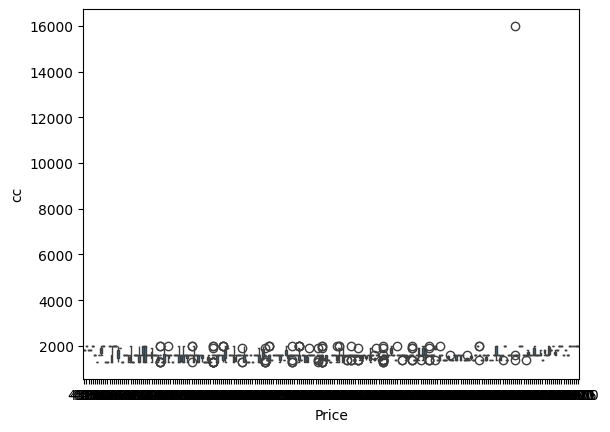

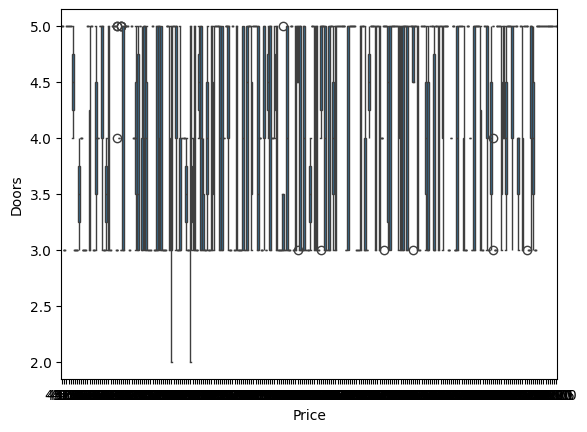

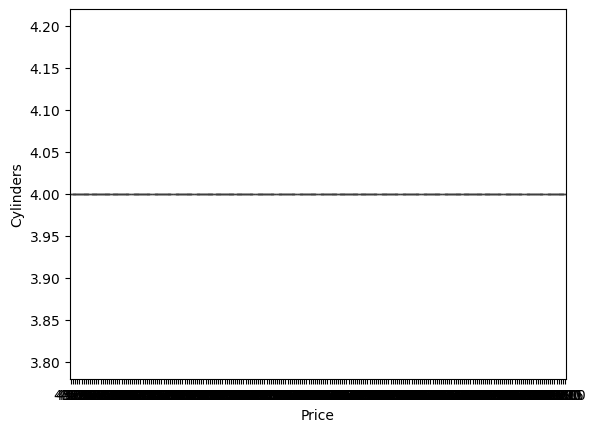

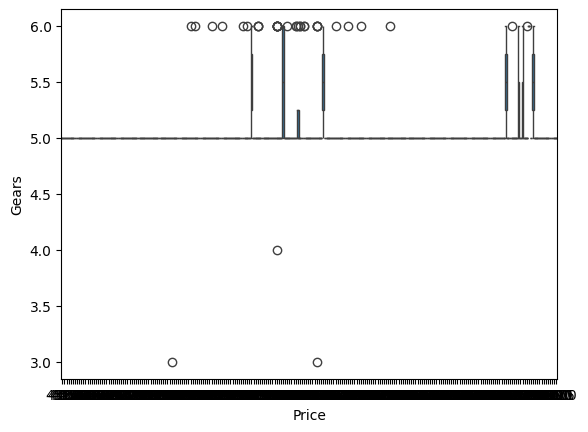

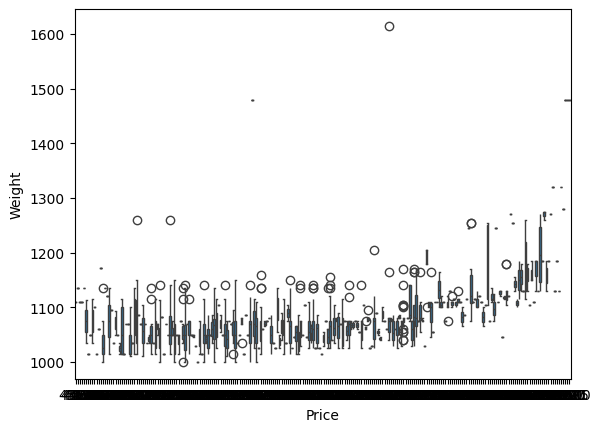

Mean Squared Error: 2203043.8231437034
R-squared: 0.8348888040611082


In [7]:
# prompt: .Perform exploratory data analysis (EDA) to gain insights into the dataset. Provide visualizations and summary statistics of the variables. Pre process the data to apply the MLR

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


# Load the dataset (replace 'your_dataset.csv' with the actual file name)
try:
    df = pd.read_csv('your_dataset.csv')
except FileNotFoundError:
    print("Error: 'your_dataset.csv' not found. Please upload your dataset or provide the correct file path.")
    exit()

# EDA
print(df.head())
print(df.info())
print(df.describe())

# Visualizations
# Histograms for numerical features
df.hist(figsize=(10, 8))
plt.show()

# Correlation matrix heatmap
# Visualizations
# Histograms for numerical features
df.hist(figsize=(10, 8))
plt.show()

# Correlation matrix heatmap
# Select only numerical features for correlation calculation
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

# Boxplots for numerical features vs. target variable
for column in df.select_dtypes(include=['number']):
    if column != 'Price':  # Assuming 'Price' is the target variable
        sns.boxplot(x='Price', y=column, data=df)
        plt.show()

# Preprocessing
# Handle missing values (if any)
for column in df.columns:
    if df[column].isnull().any():
        # Imputation strategy (e.g., mean, median, mode)
        if pd.api.types.is_numeric_dtype(df[column]):
          df[column].fillna(df[column].mean(), inplace=True)
        else:
          df[column].fillna(df[column].mode()[0], inplace=True)

# Assuming 'Price' is the target variable and other columns are features
# Select features (X) and target (y)
X = df.drop('Price', axis=1)
y = df['Price']

# Handle categorical features (if any) using one-hot encoding
X = pd.get_dummies(X)

# Feature Scaling (Standardization)
scaler = StandardScaler()
X = scaler.fit_transform(X)


# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


In [8]:
# prompt: Split the dataset into training and testing sets (e.g., 80% training, 20% testing).

# Splitting the data is already done in the provided code.
# This code snippet just prints the shapes of the resulting sets for verification.

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (1148, 12)
y_train shape: (1148,)
X_test shape: (288, 12)
y_test shape: (288,)


In [9]:
# prompt: .Build a multiple linear regression model using the training dataset. Interpret the coefficients of the model. Build minimum of 3 different models.

# Function to build and evaluate a linear regression model
def build_and_evaluate_model(X_train, y_train, X_test, y_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    return model, mse, r2


# Build and evaluate three different models with varying features (example)

# Model 1: All features
model1, mse1, r2_1 = build_and_evaluate_model(X_train, y_train, X_test, y_test)
print("Model 1 (All Features):")
print(f"  Mean Squared Error: {mse1}")
print(f"  R-squared: {r2_1}")
print("Coefficients:", model1.coef_) #Interpret coefficients

# Model 2: Selected features (example: first 5 features)
# Replace with actual feature names or indices if needed.
if X_train.shape[1] > 5:  # Check if enough features exist.
    X_train_m2 = X_train[:, :5]
    X_test_m2 = X_test[:, :5]
    model2, mse2, r2_2 = build_and_evaluate_model(X_train_m2, y_train, X_test_m2, y_test)
    print("\nModel 2 (First 5 Features):")
    print(f"  Mean Squared Error: {mse2}")
    print(f"  R-squared: {r2_2}")
    print("Coefficients:", model2.coef_) #Interpret coefficients
else:
    print("\nNot enough features to build Model 2. Skipping...")


# Model 3:  Features with high correlation to target (example)
# Replace with actual feature selection logic based on your dataset's correlations
# e.g., use correlation matrix or feature importance from another model
if X_train.shape[1] > 2: # Check if enough features exist
  # Example using the first 2 columns
  X_train_m3 = X_train[:, :2]
  X_test_m3 = X_test[:,:2]
  model3, mse3, r2_3 = build_and_evaluate_model(X_train_m3, y_train, X_test_m3, y_test)
  print("\nModel 3 (First 2 Features):")
  print(f"  Mean Squared Error: {mse3}")
  print(f"  R-squared: {r2_3}")
  print("Coefficients:", model3.coef_)
else:
  print("\nNot enough features to build Model 3. Skipping...")


#Interpretation of coefficients:

#The coefficients represent the change in the target variable ('Price') for a one-unit change in the corresponding feature, holding all other features constant.
# Positive coefficient:  An increase in the feature leads to an increase in price.
# Negative coefficient: An increase in the feature leads to a decrease in price.
# Magnitude of coefficient: Indicates the strength of the relationship between the feature and the target. Larger magnitudes suggest a stronger influence.


Model 1 (All Features):
  Mean Squared Error: 2203043.8231437034
  R-squared: 0.8348888040611082
Coefficients: [-2.24666244e+03 -6.08570564e+02  2.10253304e+02  3.41360751e+01
 -1.28850688e+01 -5.74368449e+01 -2.27373675e-13  1.03946283e+02
  1.36213868e+03 -6.98996219e+01 -2.21810225e+02  2.35258531e+02]

Model 2 (First 5 Features):
  Mean Squared Error: 2475866.597050422
  R-squared: 0.8144415964268886
Coefficients: [-2837.26898125  -443.45999373   507.48518062   160.67010446
   173.59389719]

Model 3 (First 2 Features):
  Mean Squared Error: 2925606.602783666
  R-squared: 0.7807349994776657
Coefficients: [-2845.09479825  -604.15815285]


Mean Absolute Error: 990.8872739193968
Median Absolute Error: 683.5576760403746


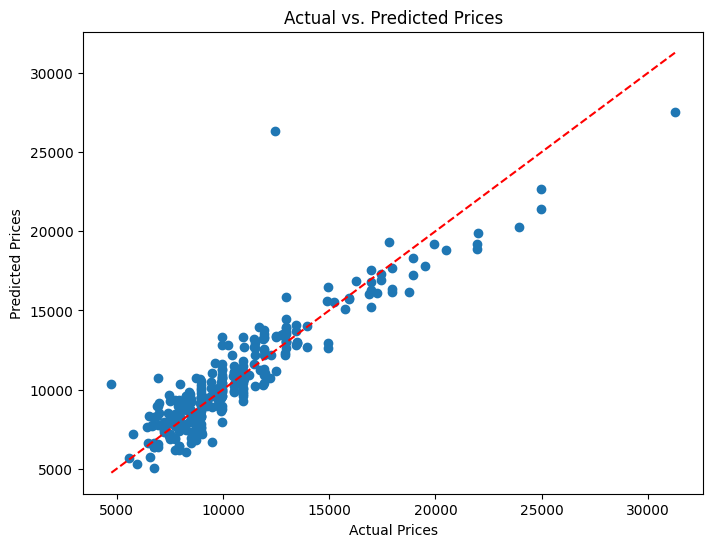

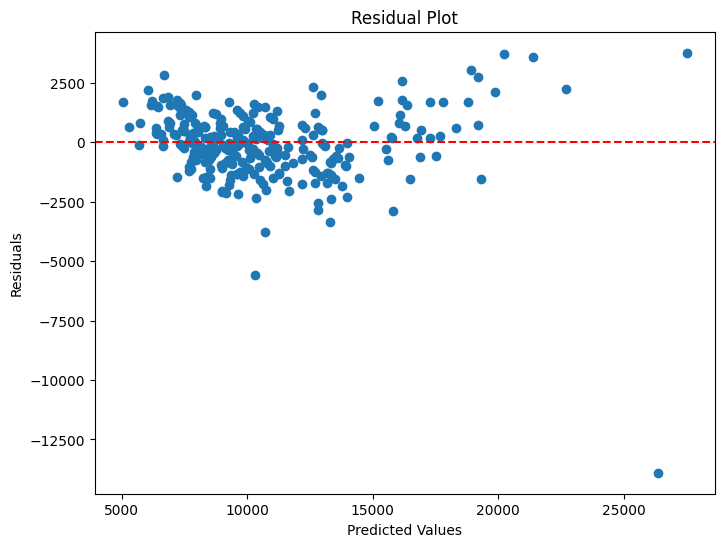

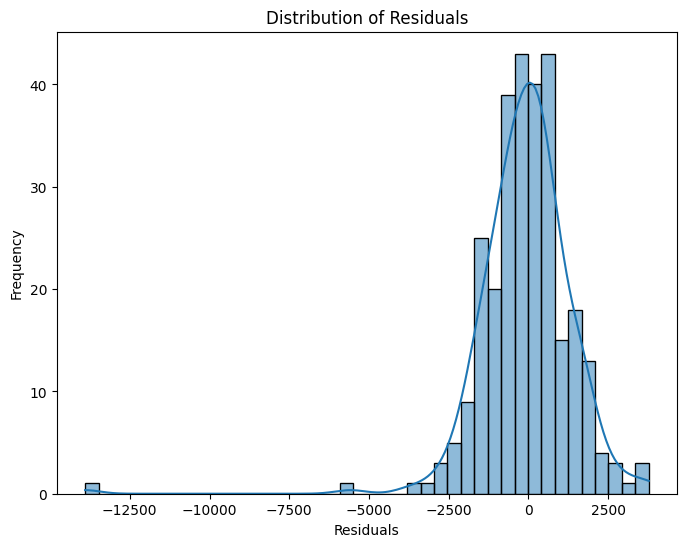

In [10]:
# prompt: .Evaluate the performance of the model using appropriate evaluation metrics on the testing dataset.

# ... (Your existing code)

# Additional evaluation metrics
from sklearn.metrics import mean_absolute_error, median_absolute_error

mae = mean_absolute_error(y_test, y_pred)
medae = median_absolute_error(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Median Absolute Error: {medae}")

# Visualize actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add a diagonal line for reference
plt.show()


# Residual analysis (Check for heteroscedasticity and normality of residuals)
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.axhline(y=0, color='red', linestyle='--') # Add a horizontal line at y=0 for reference
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True) #kde=True adds a kernel density estimate
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

#Further analysis:
#1. Cross-validation techniques (k-fold cross validation) to get a more robust estimate of model performance.
#2. Feature engineering (create new features or transform existing ones) to improve model accuracy.



In [11]:
# prompt: .Apply Lasso and Ridge methods on the model.

from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can tune the alpha parameter
lasso_model.fit(X_train, y_train)
y_pred_lasso = lasso_model.predict(X_test)
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = r2_score(y_test, y_pred_lasso)

print(f"\nLasso Regression:")
print(f"  Mean Squared Error: {mse_lasso}")
print(f"  R-squared: {r2_lasso}")

# Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can tune the alpha parameter
ridge_model.fit(X_train, y_train)
y_pred_ridge = ridge_model.predict(X_test)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f"\nRidge Regression:")
print(f"  Mean Squared Error: {mse_ridge}")
print(f"  R-squared: {r2_ridge}")



Lasso Regression:
  Mean Squared Error: 2200308.305335222
  R-squared: 0.8350938225051925

Ridge Regression:
  Mean Squared Error: 2200443.927455422
  R-squared: 0.8350836580544327


 1.What is Normalization & Standardization and how is it helpful?

Normalization and Standardization

 Normalization:
 Normalization scales the data to a specific range, typically between 0 and 1.
 It's useful when the data has varying scales and the algorithm is sensitive to feature magnitudes (e.g., k-NN, k-means).
 It's also helpful to prevent features with larger values from dominating the algorithm.
 Formula: x_normalized = (x - min(x)) / (max(x) - min(x))


 Standardization (Z-score normalization):
 Standardization transforms the data to have zero mean and unit variance.
 It's useful when the data distribution is not normal or when features have different scales and units.
 It's less affected by outliers compared to normalization.
 Formula: x_standardized = (x - mean(x)) / std(x)

How it's helpful in machine learning:
1. Improved model performance: By scaling the features, algorithms that rely on distance calculations (e.g., KNN, SVM) or gradient descent optimization (e.g., linear regression, neural networks) perform better.  Features with larger scales can disproportionately influence the model.
2. Faster convergence: Gradient descent methods converge faster when the features are standardized.
3. Preventing numerical issues: Algorithms can be sensitive to feature magnitudes. Scaling prevents numerical instability or overflow problems.
4. Easier interpretation: Coefficients of linear models are more interpretable after standardization, as they represent the change in the target variable per one standard deviation change in the feature.
Example (using StandardScaler from scikit-learn - already in your code):
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
Now use X_scaled for training


2.What techniques can be used to address multicollinearity in multiple linear regression?
Multicollinearity occurs when independent variables in a multiple linear regression model are highly correlated, leading to instability in coefficient estimates. Here are several techniques to address multicollinearity:

1. **Remove Highly Correlated Predictors** – Identify highly correlated variables using a correlation matrix or Variance Inflation Factor (VIF), then remove one of the redundant predictors.

2. **Combine Variables** – If variables are collinear but conceptually related, consider combining them into a single predictor using techniques like Principal Component Analysis (PCA).

3. **Use Ridge Regression** – Unlike ordinary least squares (OLS), ridge regression applies a penalty to large coefficients, reducing their sensitivity to collinearity.

4. **Lasso Regression** – Lasso regression helps by shrinking some coefficients to zero, effectively performing variable selection and reducing multicollinearity.

5. **Increase Sample Size** – If feasible, adding more observations can improve the reliability of coefficient estimates despite multicollinearity.

6. **Center the Variables** – Mean-centering the predictors (subtracting the mean) can reduce collinearity effects by changing the scale without affecting relationships.

7. **Use Domain Knowledge** – Consider theoretical or empirical insights to decide which variable is more relevant to retain in the model.